In [26]:
subject_ids = [13095, 14037, 14051, 14069, 15033, 15035, 15055]

In [27]:
from pystain import StainCluster, StainDataset

In [28]:
import h5py

In [ ]:
corrs = []

for subject_id in subject_ids[:]:
    ds = StainDataset(subject_id, fwhm=0.3)
#         ds.smoothed_dataframe['T2 weighted'] = ds.h5file['mri_in_stain_space'][ds.thresholded_mask]
    ds.smoothed_dataframe['T1'] = ds.h5file['T1_in_stain_space'][ds.thresholded_mask]
    ds.smoothed_dataframe['R1'] = 1./ds.h5file['T1_in_stain_space'][ds.thresholded_mask]
    
    ds.smoothed_dataframe['T2*'] = ds.h5file['T2star_in_stain_space'][ds.thresholded_mask]
    ds.smoothed_dataframe['R2*'] = 1./ds.h5file['T2star_in_stain_space'][ds.thresholded_mask]    


#         corr = ds.smoothed_dataframe.corr(method='kendall')
    corr = ds.smoothed_dataframe.corr()
    corrs.append(corr)

/home/gdholla1/data/post_mortem/new_data_format/13095/images.hdf5
/home/gdholla1/data/post_mortem/new_data_format/14037/images.hdf5
/home/gdholla1/data/post_mortem/new_data_format/14051/images.hdf5


In [ ]:
corr_matrix = np.array([corr.values for corr in corrs])

In [ ]:
import statsmodels

In [ ]:
from statsmodels.sandbox.stats import multicomp

In [ ]:
import pandas

In [ ]:
# labels = dataset.stains + ['T2* weighted', 'inverse T2* weighted']
labels = ds.stains + ['T1', 'R1', 'T2*', 'R2*']

In [ ]:
mean_rs = np.mean([corr.values for corr in corrs],0)
# mean_rs = np.ma.masked_array(mean_rs, p_corrected > 0.05)
mean_rs = pandas.DataFrame(mean_rs, columns=labels, index=labels)

In [ ]:
sns.set_context('poster')

In [ ]:
sns.heatmap(mean_rs, annot=True, )

In [ ]:
import scipy as sp
from scipy import spatial
import scipy.cluster.hierarchy as hc


In [ ]:
DF_dism = 1 - mean_rs   # distance matrix
linkage = hc.linkage(sp.spatial.distance.squareform(DF_dism), method='average', )

mean_rs_ = mean_rs.copy()
np.fill_diagonal(mean_rs_.values, 0)

mean_rs.ix['R1', 'T1'] = np.nan
mean_rs.ix['T1', 'R1'] = np.nan
mean_rs.ix['R2*', 'T2*'] = np.nan
mean_rs.ix['T2*', 'R2*'] = np.nan

cg = sns.clustermap(np.round(mean_rs, 2), row_linkage=linkage, col_linkage=linkage, cmap='coolwarm', annot=True)

plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

stain_order = [t.get_text() for t in cg.ax_heatmap.get_xticklabels()]

plt.gcf().set_size_inches(15, 15)

plt.savefig('hierachical_clusters.pdf')

In [109]:
t, p = sp.stats.ttest_1samp(corr_matrix, 0)

t = pandas.DataFrame(t, columns=dataset.stains + ['T2* weighted MRI'], index=dataset.stains + ['T2* weighted MRI'])


In [110]:
p_mask = ~np.isnan(p)

In [111]:
_, p_corrected_ravel = multicomp.fdrcorrection0(p[p_mask].ravel(), alpha=0.05)
p_corrected = np.zeros_like(p)
p_corrected[p_mask] = p_corrected_ravel

In [88]:
dataset.stains + ['T2* weighted MRI']

['CALR',
 'FER',
 'GABRA3',
 'GAD6567',
 'MBP',
 'PARV',
 'SERT',
 'SMI32',
 'SYN',
 'TH',
 'TRANSF',
 'VGLUT1',
 'T2* weighted MRI']

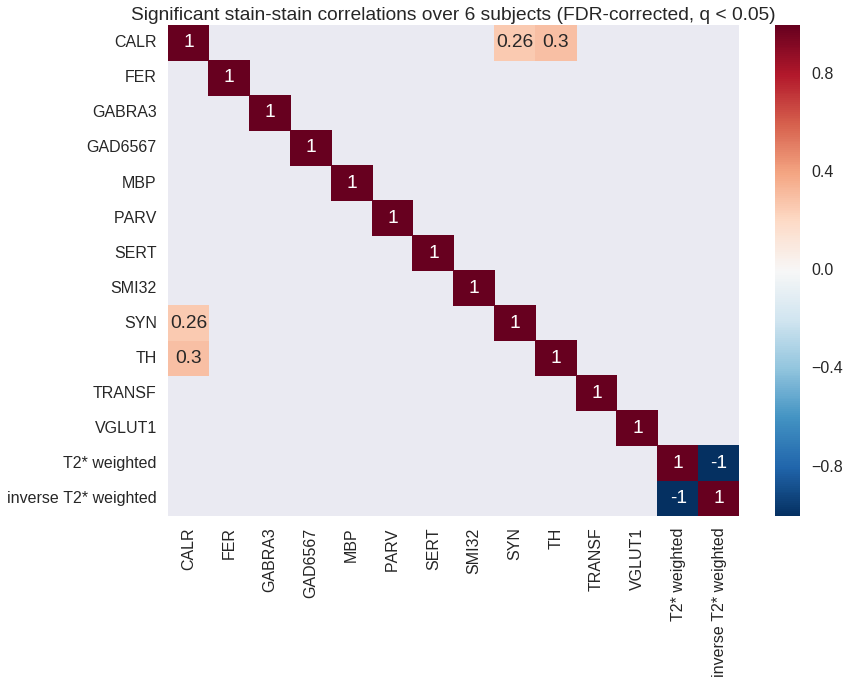

In [92]:
mean_rs = np.mean([corr.values for corr in corrs],0)
mean_rs = np.ma.masked_array(mean_rs, p_corrected > 0.05)
pandas.DataFrame(mean_rs, columns=labels, index=labels)

sns.heatmap(pandas.DataFrame(np.round(mean_rs, 2), columns=labels, index=labels), annot=True)
plt.title('Significant stain-stain correlations over 6 subjects (FDR-corrected, q < 0.05)')
# plt.savefig(pdf, format='pdf')

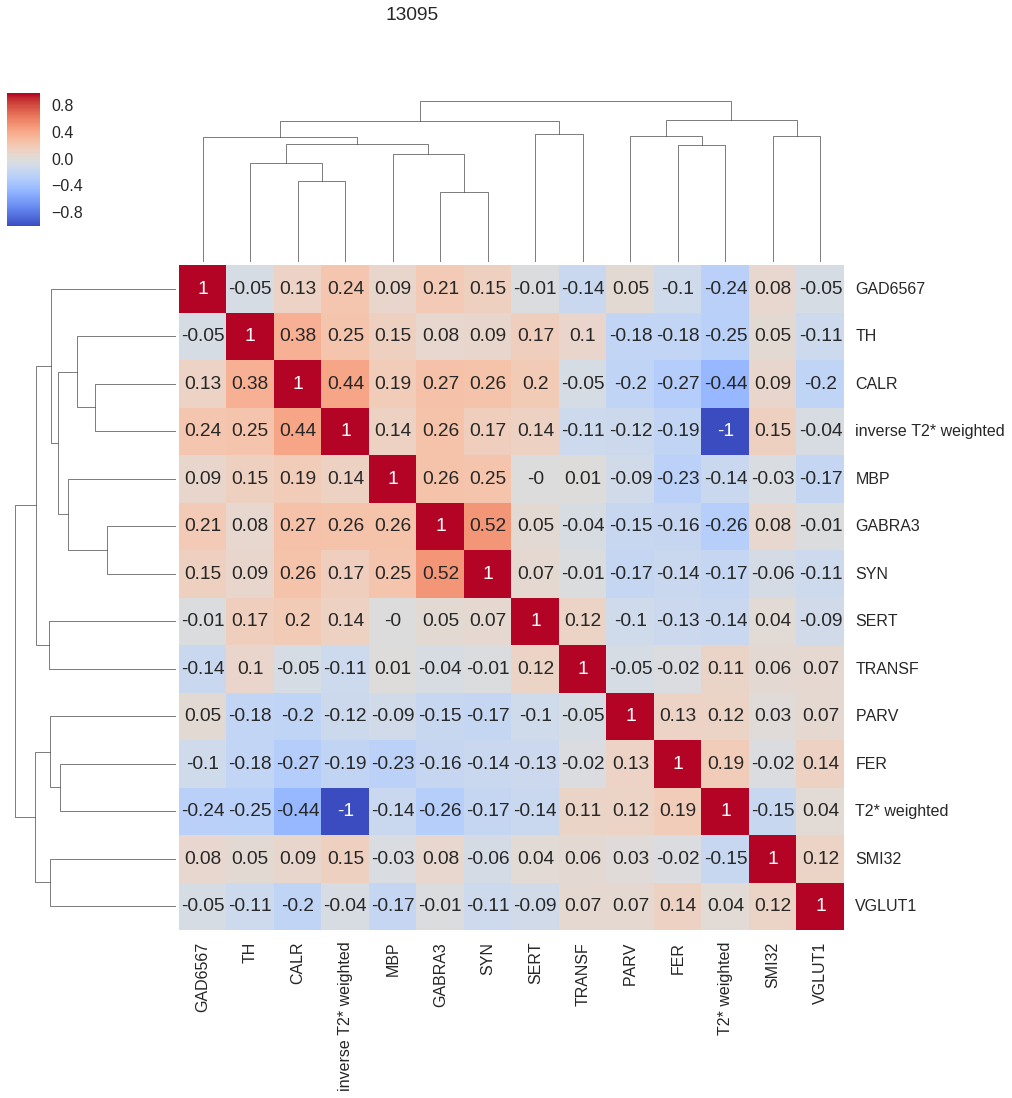

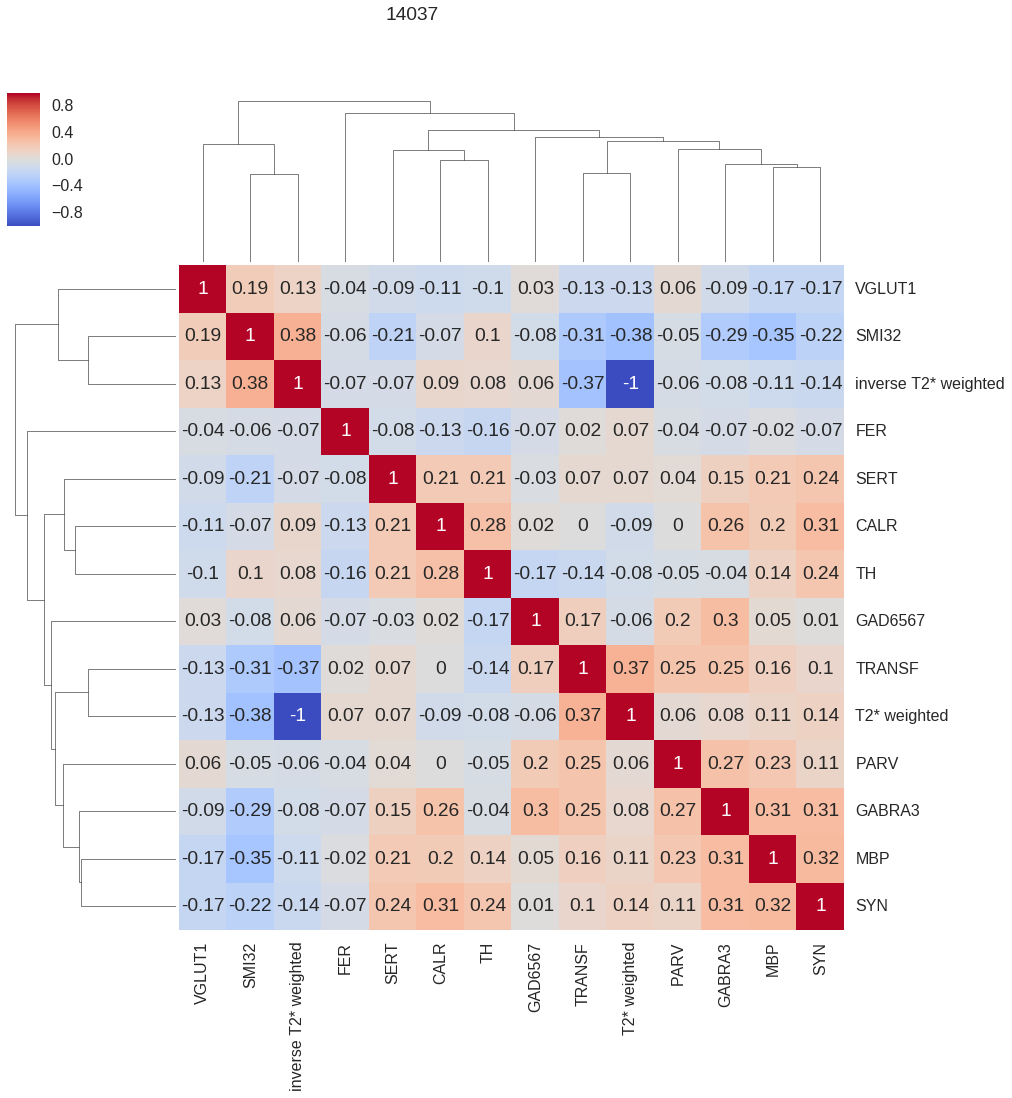

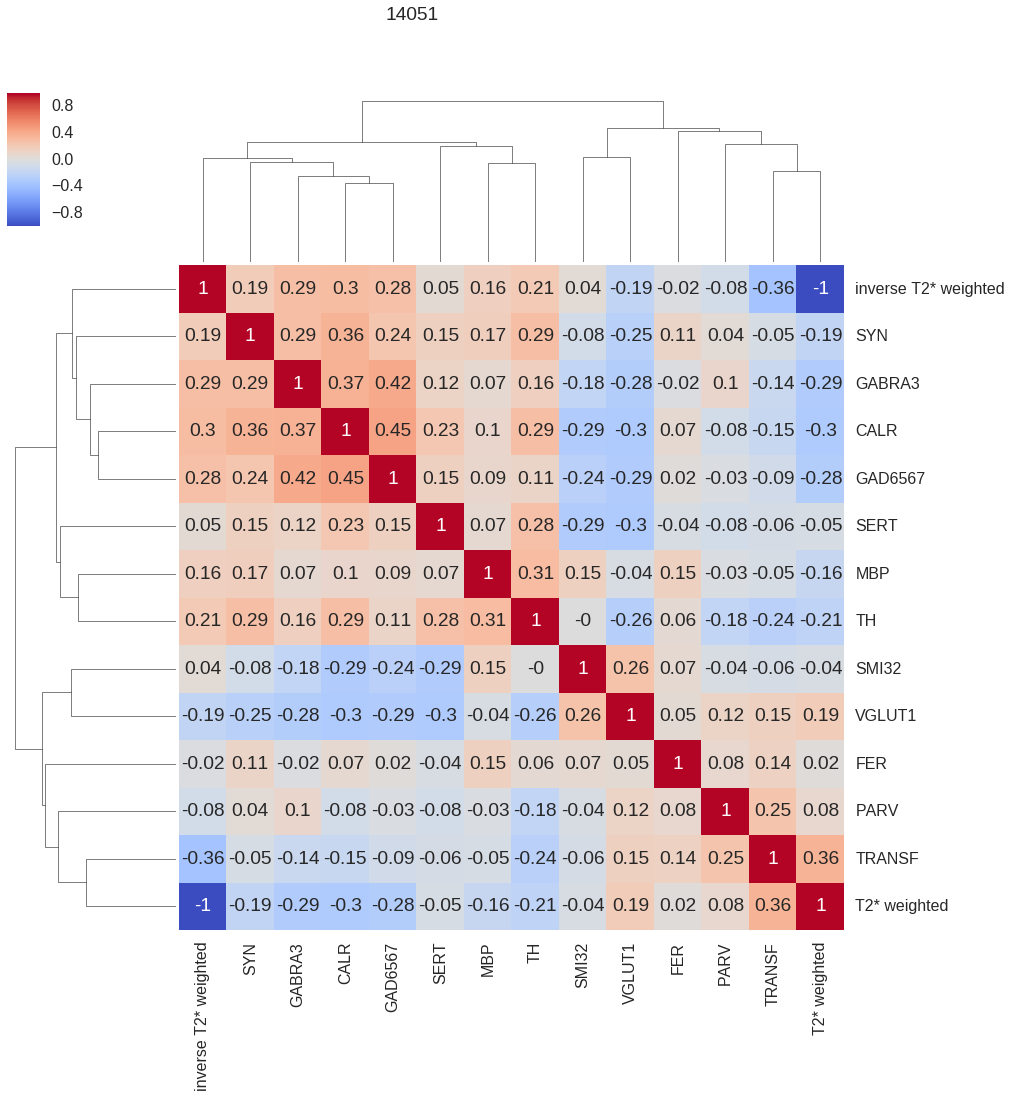

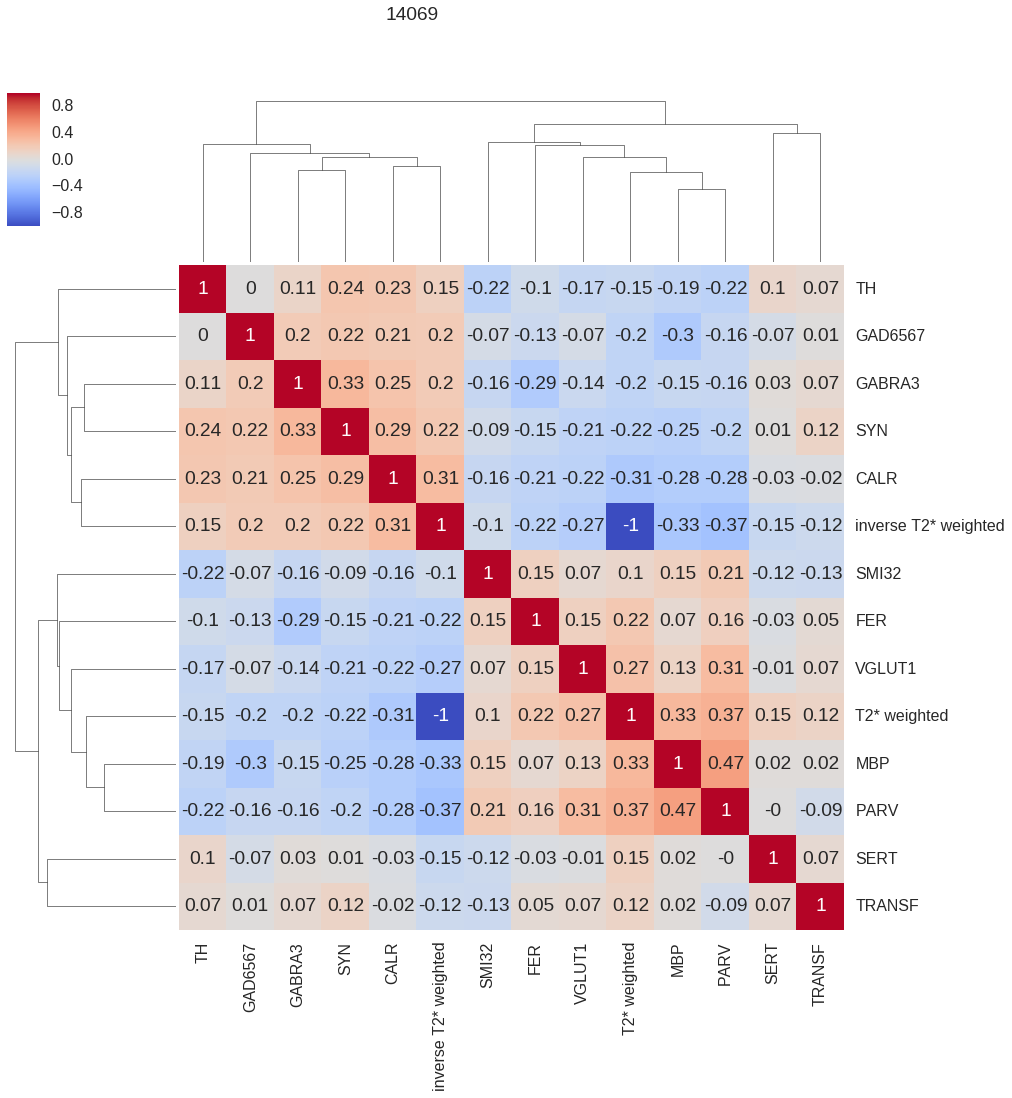

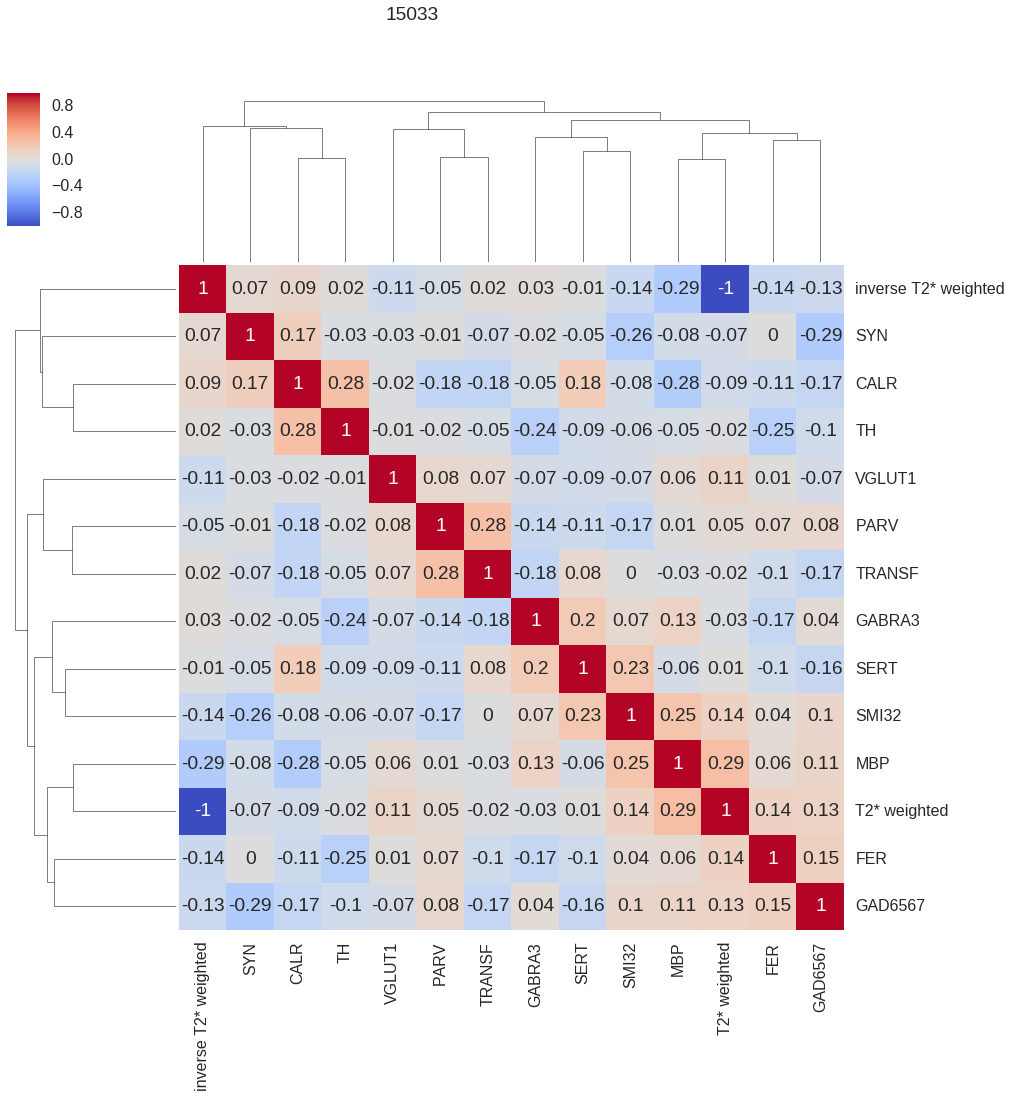

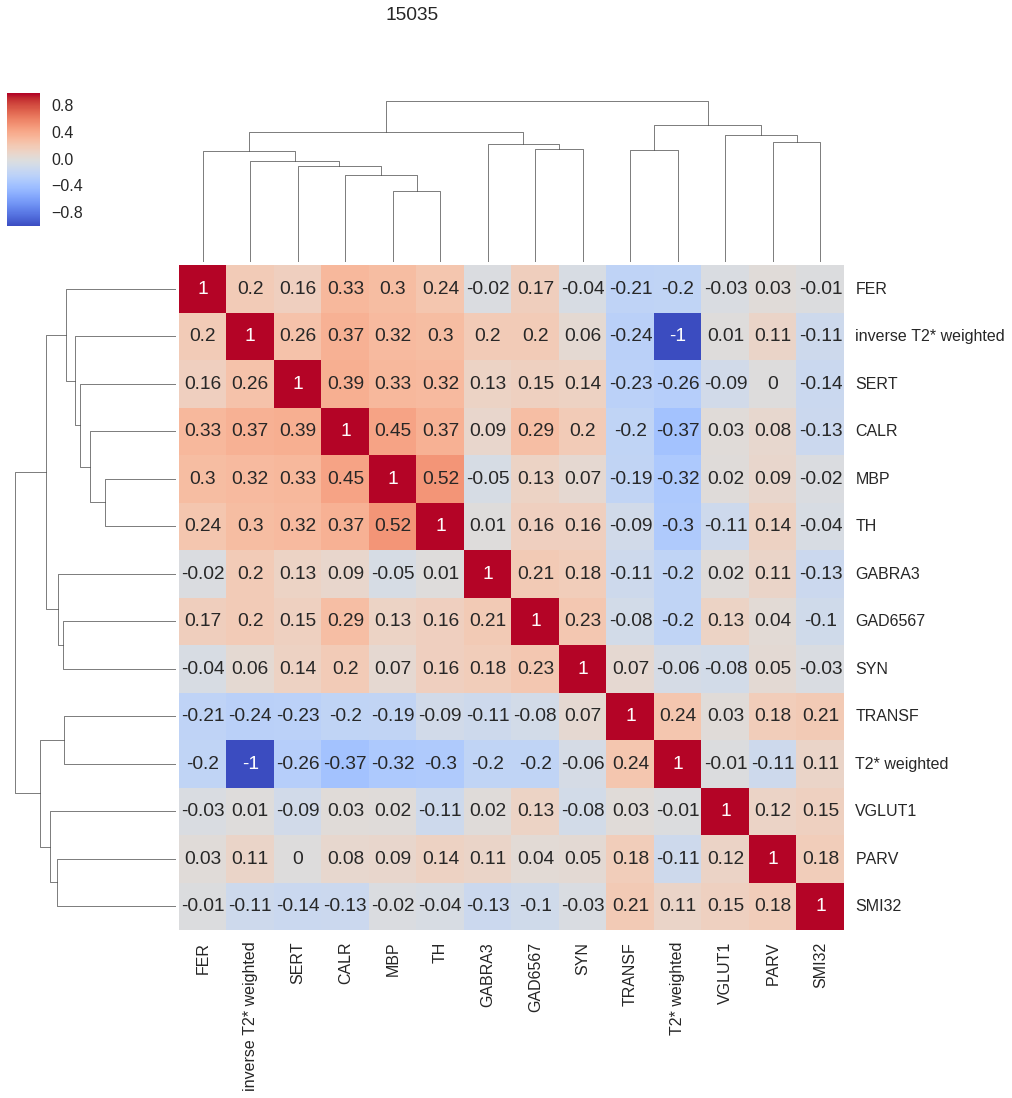

In [93]:
for subject_id, m in zip(subject_ids, corr_matrix):
    plt.figure()
    DF_dism = 1 - m   # distance matrix
    
    m = pandas.DataFrame(m, columns=labels, index=labels)
    
    linkage = hc.linkage(sp.spatial.distance.squareform(DF_dism, ), method='average')


    cg = sns.clustermap(np.round(m, 2), row_linkage=linkage, col_linkage=linkage, cmap='coolwarm', annot=True, )

    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

    plt.gcf().set_size_inches(15, 15)

    plt.suptitle(subject_id)
    
    plt.savefig('hierachical_clusters_%s.pdf' % subject_id)
    

In [54]:
import pystain

In [55]:
import nibabel as nb

In [56]:
mask = nb.load('/home/gdholla1/data/post_mortem/group_templates/template_10_iterations/_stain_mask/13095_mask_flirt_merged_mean.nii.gz').get_data()

In [57]:
x, slice, z = np.where(mask > 2/7.)

In [58]:
x_ps = np.percentile(x, [50])
slice_ps = np.percentile(slice, [50])
z_ps = np.percentile(z, [50])

In [59]:
subject_ids = [13095, 14037, 14051, 14069, 15033, 15035, 15055]

stains = ['CALR',
 'FER',
 'GABRA3',
 'GAD6567',
 'MBP',
 'PARV',
 'SERT',
 'SMI32',
 'SYN',
 'TH',
 'TRANSF',
 'VGLUT1']

In [60]:
import scipy as sp
from scipy import stats

In [61]:
xy_resolution = 0.014091858037578288
z_resolution = 0.3

In [62]:
x_ticks = np.arange(0, 8) / xy_resolution, np.arange(0, 8)
z_ticks = np.arange(0, 9) / xy_resolution, np.arange(0, 9)
slice_ticks = np.arange(0, 10) / z_resolution, np.arange(0, 10)

In [63]:
sns.set_context('poster')
sns.set_style('whitegrid')

In [64]:
from matplotlib.backends.backend_pdf import PdfPages


In [42]:
fwhm = 0.3

for stain in stains[:]:
    
    fn = '%s_viz.pdf' % stain
    pdf = PdfPages(fn)
    
    print stain

    data = []

    for i, subject_id in enumerate(subject_ids[:]):

        i_d = '%02d' % i

        tmp = nb.load('/home/gdholla1/data/post_mortem/group_templates/transformed_stains_based_on_mask_template/_fwhm_{fwhm}_stain_{stain}/_applier{i}/{subject_id}_{stain}_fwhm_{fwhm}_flirt.nii.gz'.format(**locals())).get_data()

        tmp[tmp != 0] -= tmp[tmp != 0].mean()
        tmp[tmp != 0] /= tmp[tmp != 0].std()
        tmp[tmp == 0] = np.nan


        data.append(tmp)

    data = np.array(data)

    mask = np.isnan(data).sum(0) > 3

    mean_data = np.ma.masked_array(np.nanmean(data, 0), mask)

    t, p = sp.stats.ttest_1samp(data, 0, nan_policy='omit')
    
#     _, p[~mask] = statsmodels.sandbox.stats.multicomp.fdrcorrection0(p[~mask].ravel())

    t = np.ma.masked_array(t, mask)

    plt.figure(figsize=(15, 7.5))
    for i, c in enumerate(slice_ps):
        plt.subplot(1,3,i*3+1)

        plt.imshow(mean_data[:, c, :].T, origin='lower', cmap=plt.cm.v, extent=(0, mean_data.shape[-1] * xy_resolution, 0, mean_data.shape[0] * xy_resolution))
        plt.ylim(0, 8)
        plt.xlim(1, 9)
        plt.xticks([])
        plt.yticks([])        


    for i, c in enumerate(x_ps):
        plt.subplot(1,3,i*3+2)
        plt.imshow(mean_data[c, :, :].T, origin='lower', cmap=plt.cm.inferno, extent=[0, z_resolution*mean_data.shape[1], 0, xy_resolution*mean_data.shape[2]])
        plt.ylim(1, 9)
        plt.xlim(1, 9)
        plt.xticks([])
        plt.yticks([])        


    for i, c in enumerate(z_ps):
        plt.subplot(1,3,i*3+3)
        plt.imshow(mean_data[:, :, c].T, origin='lower', cmap=plt.cm.inferno, extent=[0, xy_resolution*mean_data.shape[0], 0, z_resolution*mean_data.shape[1]])
        plt.xlim(0, 8)
        plt.ylim(1, 9)
        plt.xticks([])
        plt.yticks([])
        

    
    plt.tight_layout()
    plt.savefig(pdf, format='pdf')
#     plt.close(plt.gcf())
    
    pdf.close()

CALR


/usr/local/lib/python2.7/dist-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:3158: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dout = self.data[indx]
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:3213: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dout._mask = _mask[indx]


FER
GABRA3
GAD6567
MBP
PARV
SERT
SMI32
SYN
TH
TRANSF
VGLUT1


In [ ]:
sns.palplot(plt.cm.)

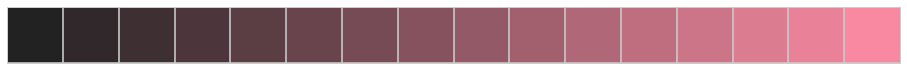

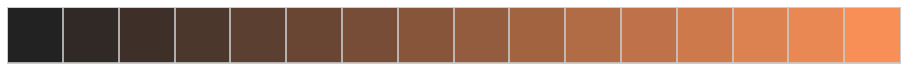

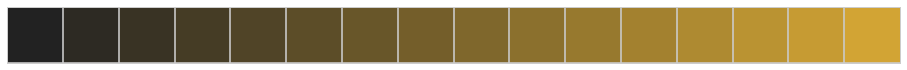

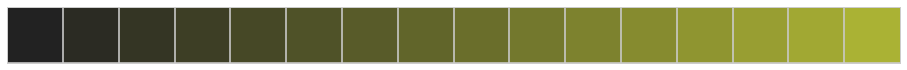

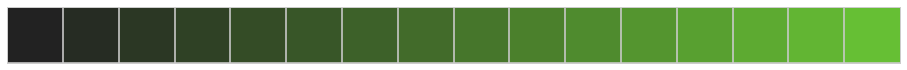

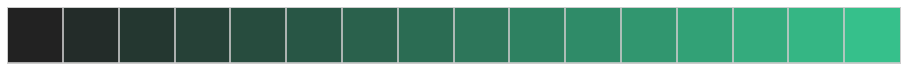

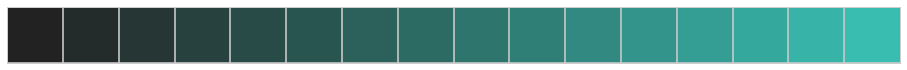

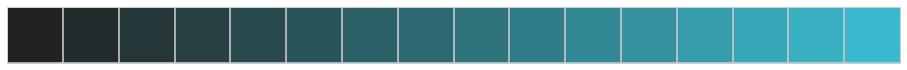

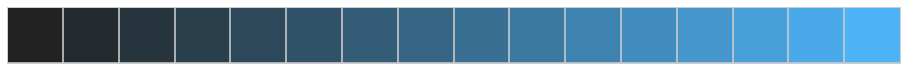

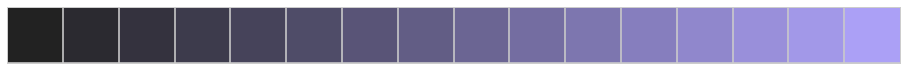

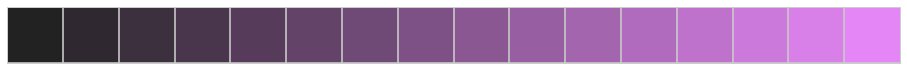

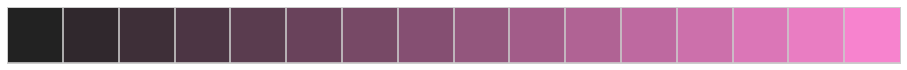

In [85]:
for i in np.arange(n_components):
    plt.figure()
    sns.palplot(sns.dark_palette((i * 360 / n_components, 90, 70), 16, input="husl", ))

In [86]:
cmaps = [sns.dark_palette((i * 360 / n_components, 90, 75), 256, input="husl", as_cmap=True) for i in np.arange(n_components)]

SERT
TH
GAD6567
CALR
GABRA3
SYN
SMI32
VGLUT1
PARV
TRANSF
FER
MBP


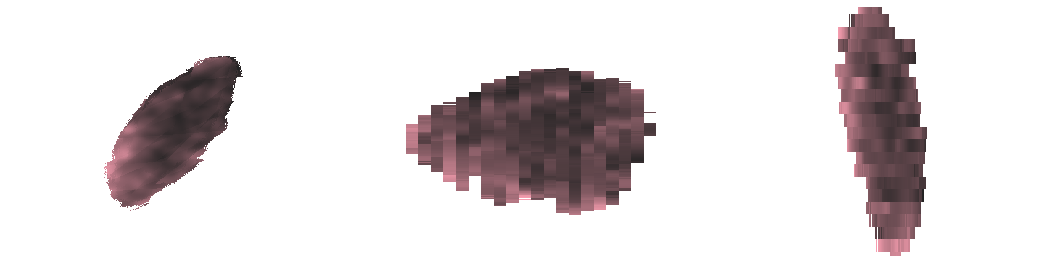

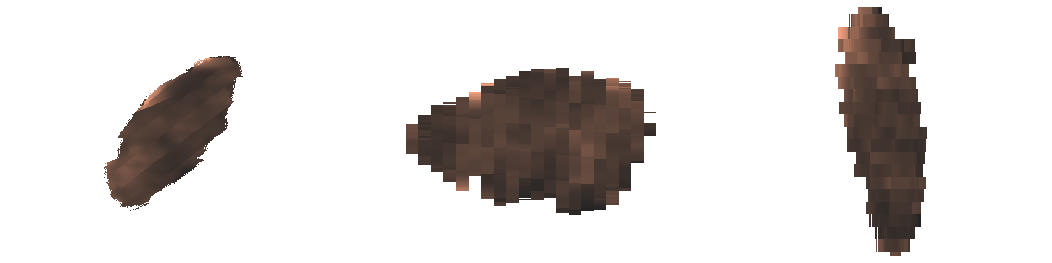

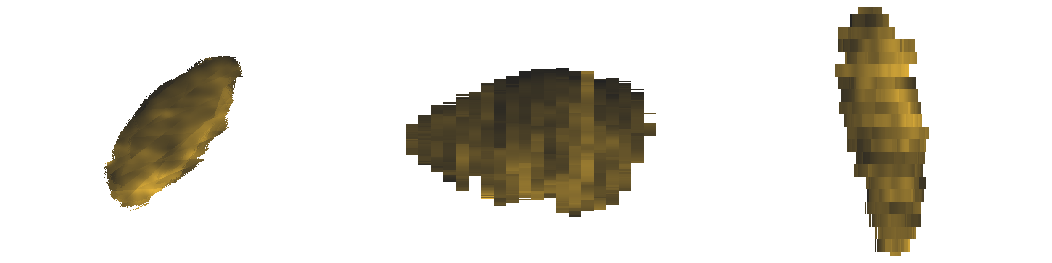

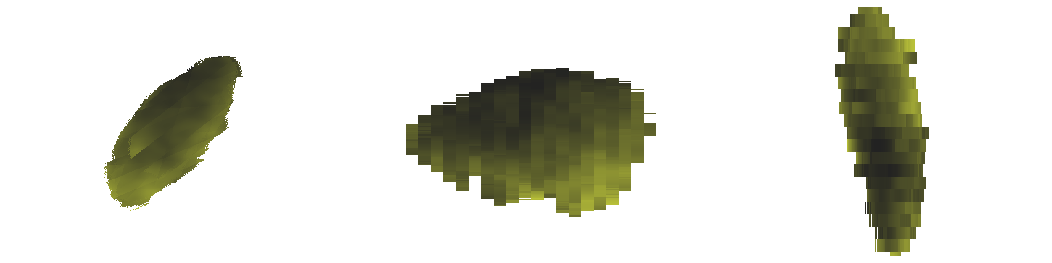

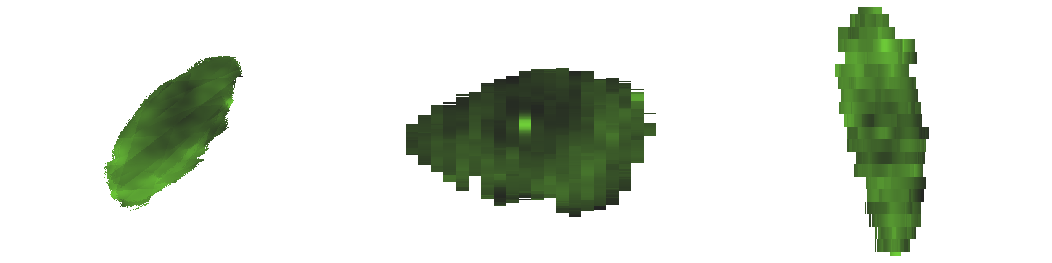

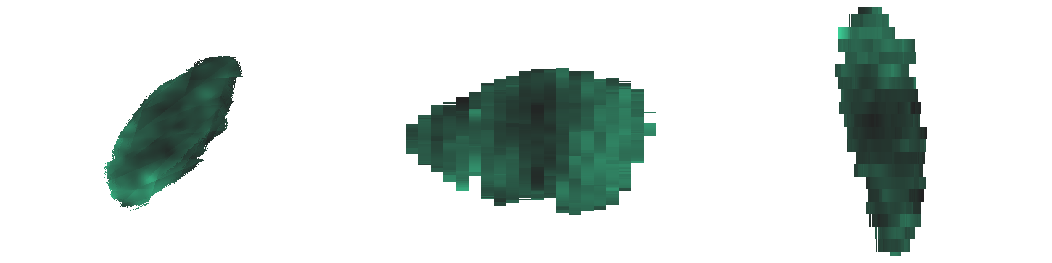

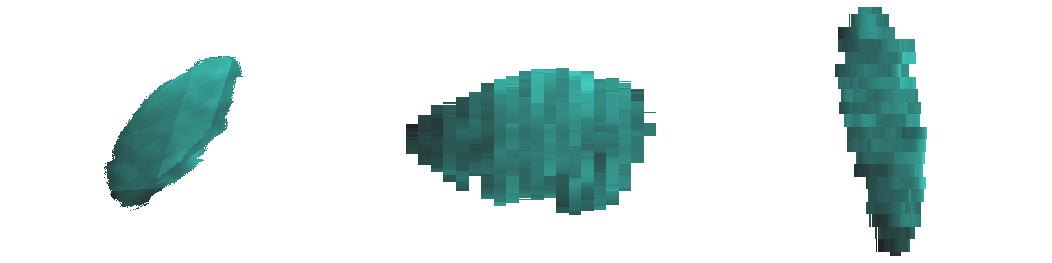

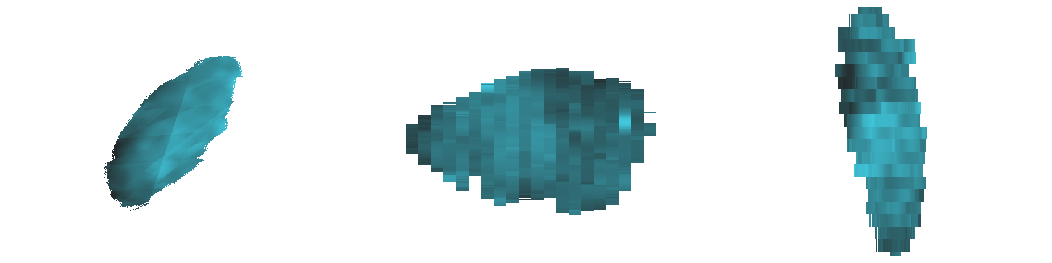

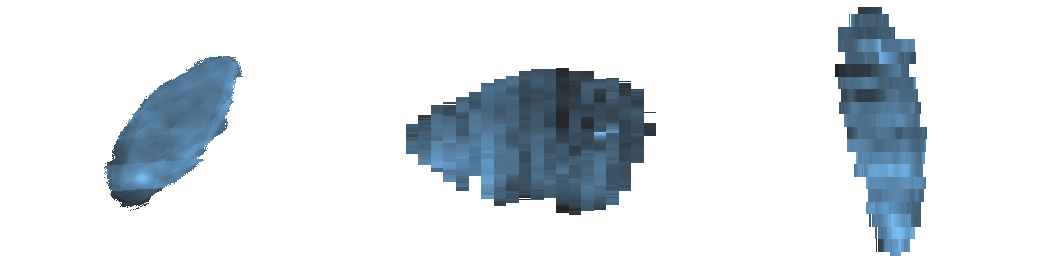

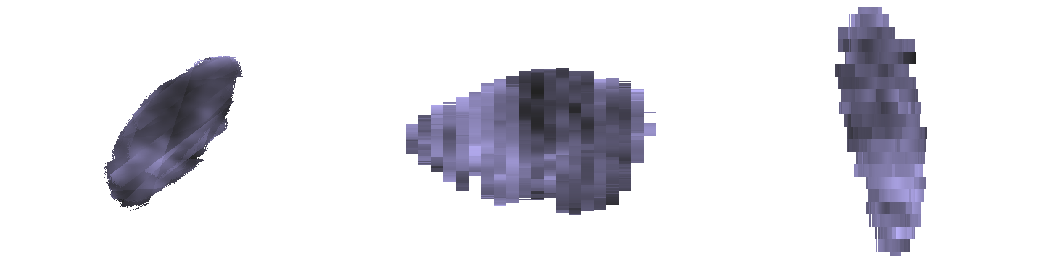

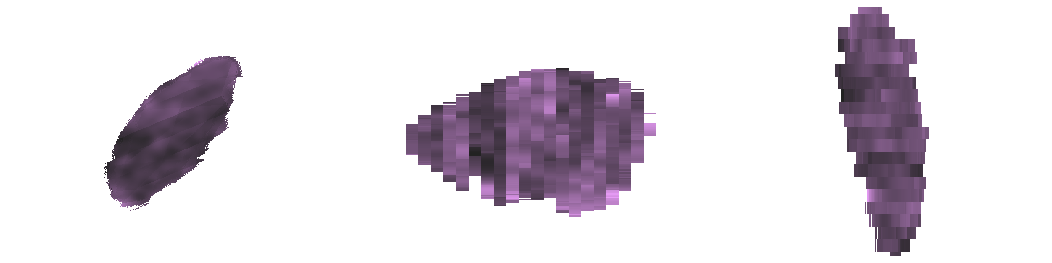

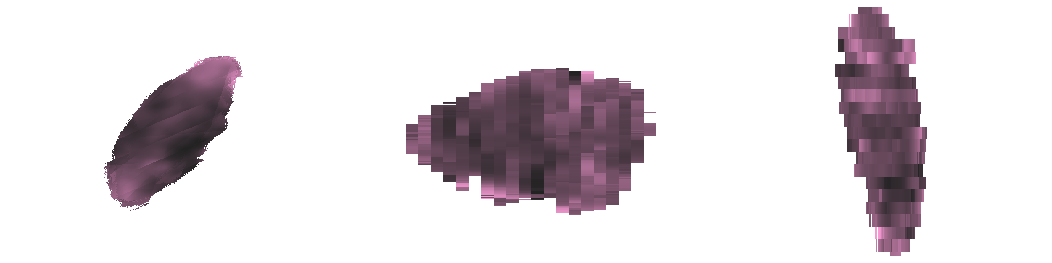

In [92]:
fwhm = 0.3

for stain_idx, stain in enumerate(stain_order[:]):
    
    fn = '%s_viz_color.pdf' % stain
    pdf = PdfPages(fn)
    
    print stain

    data = []

    for i, subject_id in enumerate(subject_ids[:]):

        i_d = '%02d' % i

        tmp = nb.load('/home/gdholla1/data/post_mortem/group_templates/transformed_stains_based_on_mask_template/_fwhm_{fwhm}_stain_{stain}/_applier{i}/{subject_id}_{stain}_fwhm_{fwhm}_flirt.nii.gz'.format(**locals())).get_data()

        tmp[tmp != 0] -= tmp[tmp != 0].mean()
        tmp[tmp != 0] /= tmp[tmp != 0].std()
        tmp[tmp == 0] = np.nan


        data.append(tmp)


    data = np.array(data)

    mask = np.isnan(data).sum(0) > 3

    mean_data = np.ma.masked_array(np.nanmean(data, 0), mask)

    t, p = sp.stats.ttest_1samp(data, 0, nan_policy='omit')
    
#     _, p[~mask] = statsmodels.sandbox.stats.multicomp.fdrcorrection0(p[~mask].ravel())



    t = np.ma.masked_array(t, mask)

    plt.figure(figsize=(15, 7.5))
    for i, c in enumerate(slice_ps):
        plt.subplot(1,3,i*3+1)

        plt.imshow(mean_data[:, c, :].T, origin='lower', cmap=cmaps[stain_idx], extent=(0, mean_data.shape[-1] * xy_resolution, 0, mean_data.shape[0] * xy_resolution), interpolation='nearest')
        plt.ylim(1, 7)
        plt.xlim(1, 9)
        plt.xticks([])
        plt.yticks([]) 
        sns.despine(left=True, bottom=True)        


    for i, c in enumerate(x_ps):
        plt.subplot(1,3,i*3+2)
        plt.imshow(mean_data[c, :, :].T, origin='lower', cmap=cmaps[stain_idx], extent=[0, z_resolution*mean_data.shape[1], 0, xy_resolution*mean_data.shape[2]], interpolation='nearest')
        plt.ylim(2, 8)
        plt.xlim(1, 9)
        plt.xticks([])
        plt.yticks([])   
        sns.despine(left=True, bottom=True)                


    for i, c in enumerate(z_ps):
        plt.subplot(1,3,i*3+3)
        plt.imshow(mean_data[:, :, c].T, origin='lower', cmap=cmaps[stain_idx], extent=[0, xy_resolution*mean_data.shape[0], 0, z_resolution*mean_data.shape[1]], interpolation='nearest')
        plt.xlim(0, 8)
        plt.ylim(2, 8)
        plt.xticks([])
        plt.yticks([])
        sns.despine(left=True, bottom=True)                
        
    

    
    plt.tight_layout()
    plt.savefig(pdf, format='pdf', transparent=True)
#     plt.close(plt.gcf())
    
    pdf.close()

(array([  1.07653000e+05,   2.64993000e+05,   8.60550000e+04,
          2.19400000e+04,   5.34200000e+03,   1.06500000e+03,
          2.84000000e+02,   7.90000000e+01,   5.10000000e+01,
          7.00000000e+01]),
 array([-0.94611789, -0.38992755,  0.16626279,  0.72245313,  1.27864346,
         1.8348338 ,  2.39102414,  2.94721448,  3.50340481,  4.05959515,
         4.61578549]),
 <a list of 10 Patch objects>)

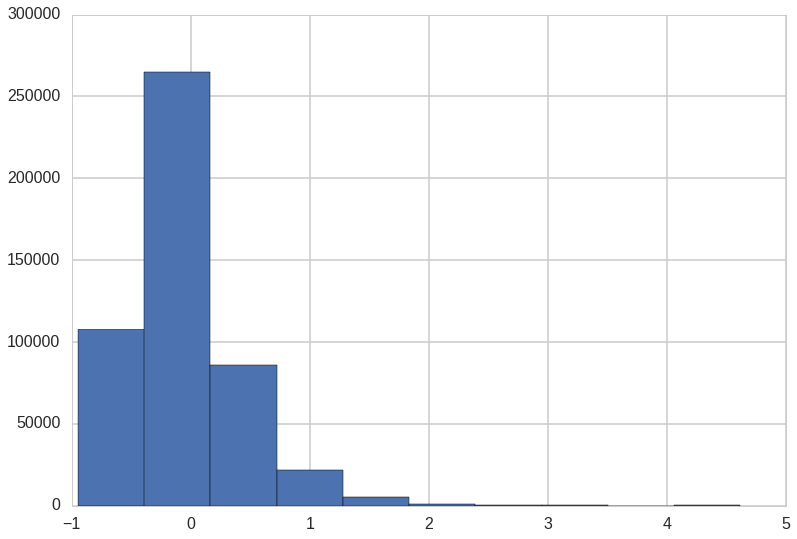

In [97]:
plt.hist(mean_data.compressed())

SERT
TH
GAD6567
CALR
GABRA3
SYN
SMI32
VGLUT1
PARV
TRANSF
FER
MBP


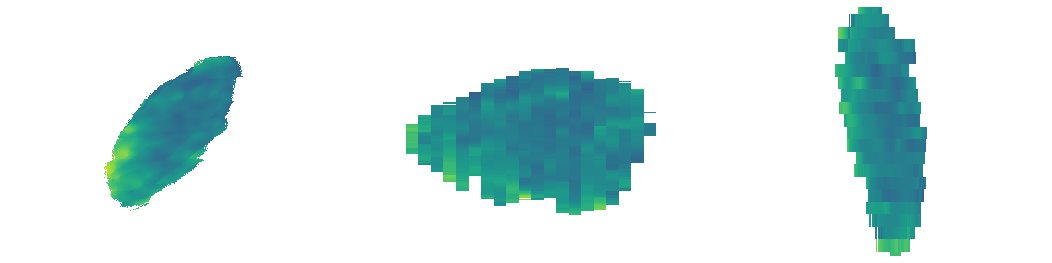

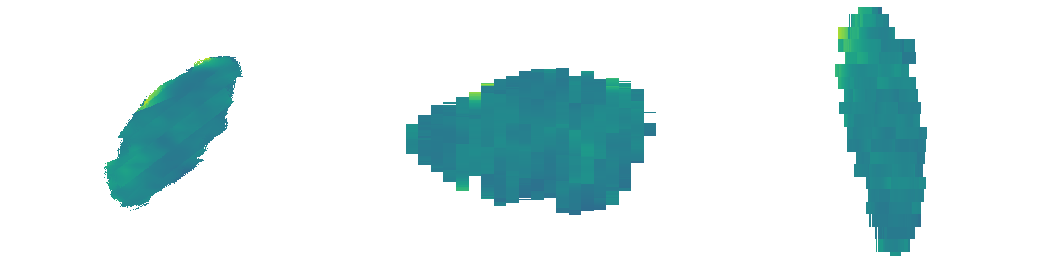

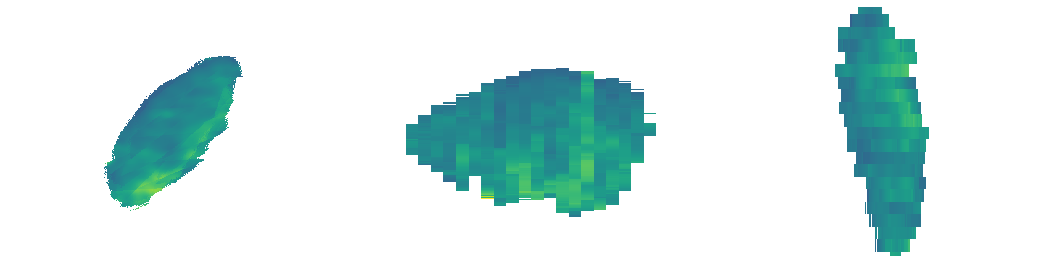

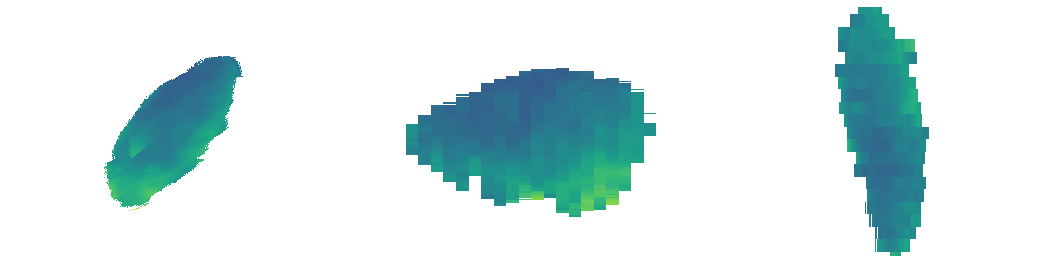

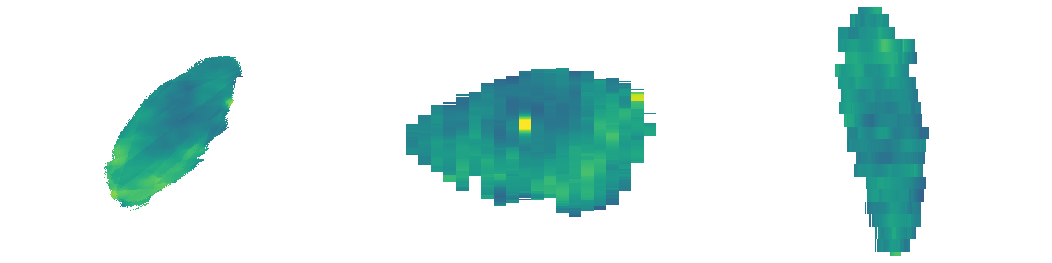

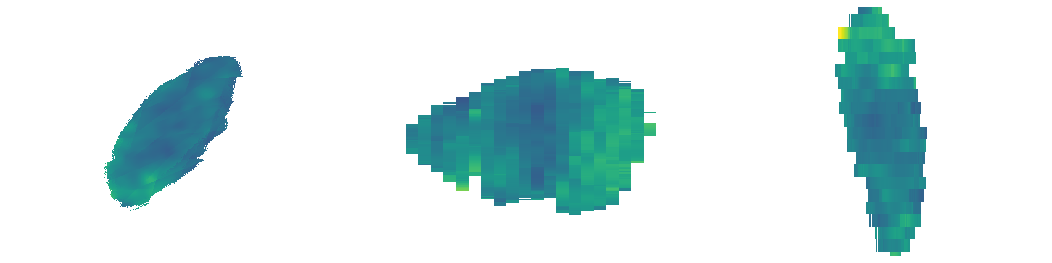

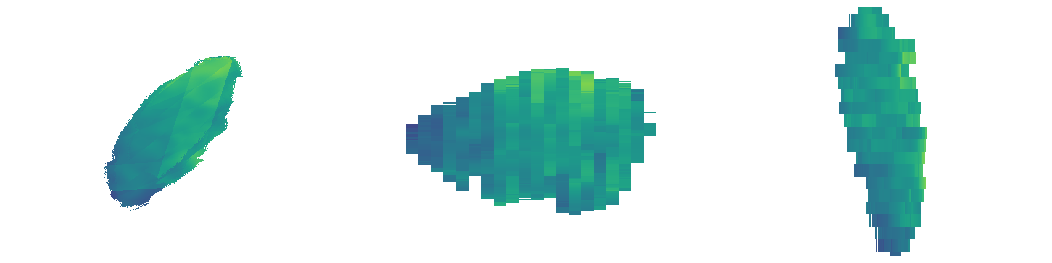

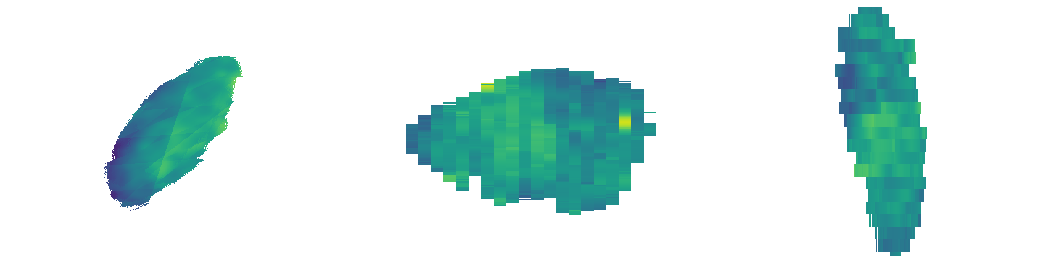

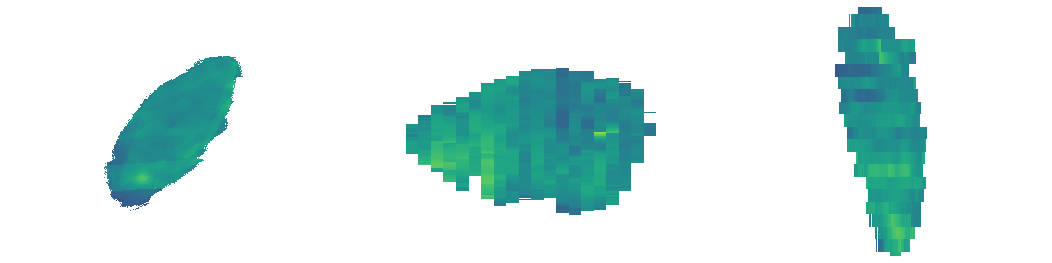

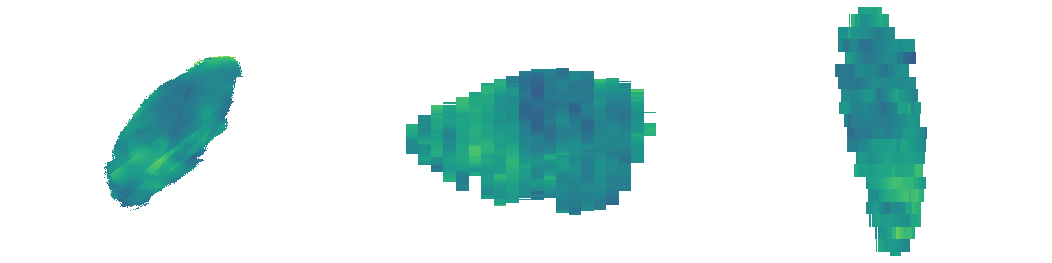

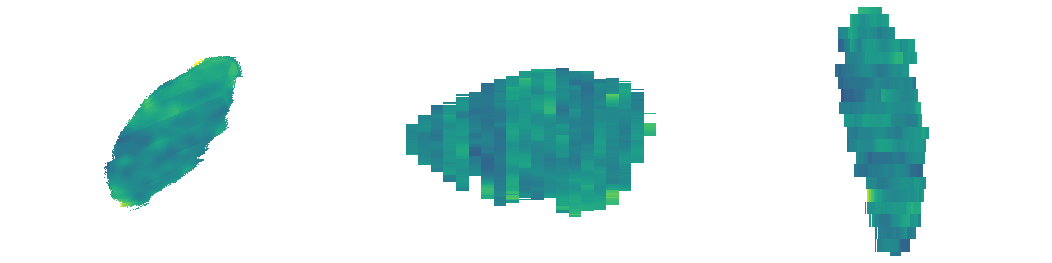

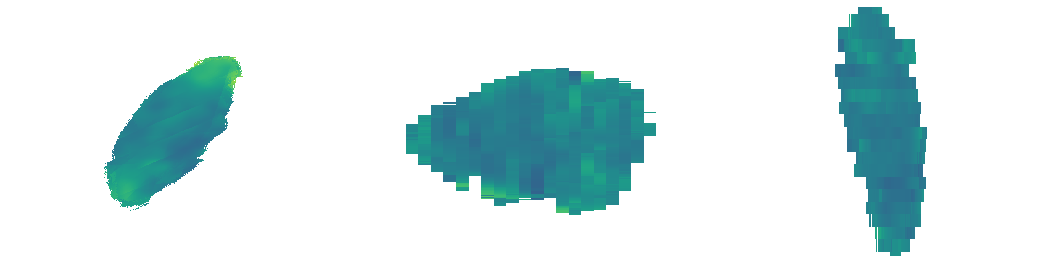

In [98]:
fwhm = 0.3

for stain_idx, stain in enumerate(stain_order[:]):
    
    fn = '%s_viz_viridis.pdf' % stain
    pdf = PdfPages(fn)
    
    print stain

    data = []

    for i, subject_id in enumerate(subject_ids[:]):

        i_d = '%02d' % i

        tmp = nb.load('/home/gdholla1/data/post_mortem/group_templates/transformed_stains_based_on_mask_template/_fwhm_{fwhm}_stain_{stain}/_applier{i}/{subject_id}_{stain}_fwhm_{fwhm}_flirt.nii.gz'.format(**locals())).get_data()

        tmp[tmp != 0] -= tmp[tmp != 0].mean()
        tmp[tmp != 0] /= tmp[tmp != 0].std()
        tmp[tmp == 0] = np.nan


        data.append(tmp)


    data = np.array(data)

    mask = np.isnan(data).sum(0) > 3

    mean_data = np.ma.masked_array(np.nanmean(data, 0), mask)

    t, p = sp.stats.ttest_1samp(data, 0, nan_policy='omit')
    
#     _, p[~mask] = statsmodels.sandbox.stats.multicomp.fdrcorrection0(p[~mask].ravel())



    t = np.ma.masked_array(t, mask)

    plt.figure(figsize=(15, 7.5))
    for i, c in enumerate(slice_ps):
        plt.subplot(1,3,i*3+1)

        plt.imshow(mean_data[:, c, :].T, origin='lower', cmap=plt.cm.viridis, extent=(0, mean_data.shape[-1] * xy_resolution, 0, mean_data.shape[0] * xy_resolution), interpolation='nearest', vmin=-2.5, vmax=2.5)
        plt.ylim(1, 7)
        plt.xlim(1, 9)
        plt.xticks([])
        plt.yticks([]) 
        sns.despine(left=True, bottom=True)        


    for i, c in enumerate(x_ps):
        plt.subplot(1,3,i*3+2)
        plt.imshow(mean_data[c, :, :].T, origin='lower', cmap=plt.cm.viridis, extent=[0, z_resolution*mean_data.shape[1], 0, xy_resolution*mean_data.shape[2]], interpolation='nearest', vmin=-2.5, vmax=2.5)
        plt.ylim(2, 8)
        plt.xlim(1, 9)
        plt.xticks([])
        plt.yticks([])   
        sns.despine(left=True, bottom=True)                


    for i, c in enumerate(z_ps):
        plt.subplot(1,3,i*3+3)
        plt.imshow(mean_data[:, :, c].T, origin='lower', cmap=plt.cm.viridis, extent=[0, xy_resolution*mean_data.shape[0], 0, z_resolution*mean_data.shape[1]], interpolation='nearest', vmin=-2.5, vmax=2.5)
        plt.xlim(0, 8)
        plt.ylim(2, 8)
        plt.xticks([])
        plt.yticks([])
        sns.despine(left=True, bottom=True)                
        
    

    
    plt.tight_layout()
    plt.savefig(pdf, format='pdf', transparent=True)
#     plt.close(plt.gcf())
    
    pdf.close()

SERT
TH
GAD6567
CALR
GABRA3
SYN
SMI32
VGLUT1
PARV
TRANSF
FER
MBP


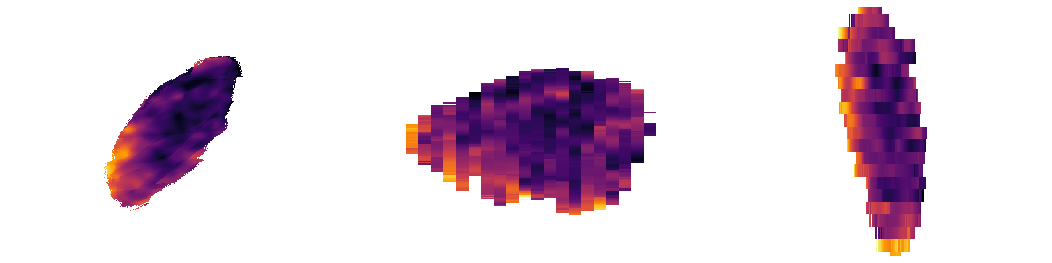

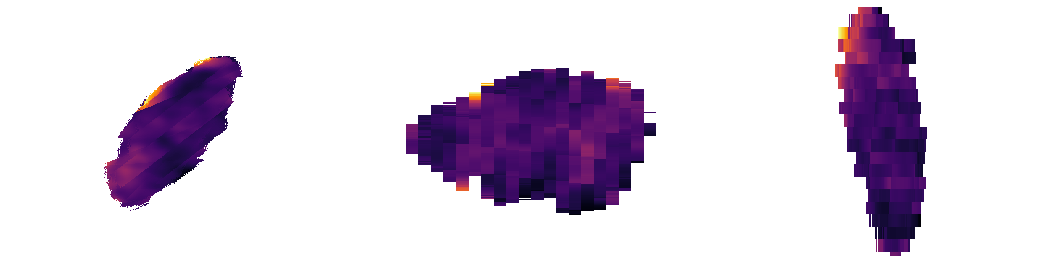

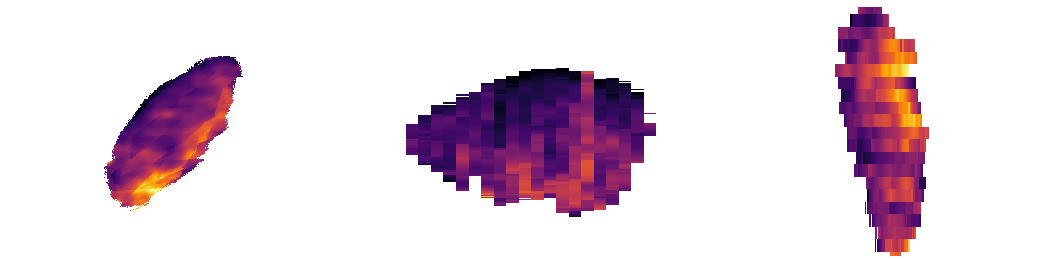

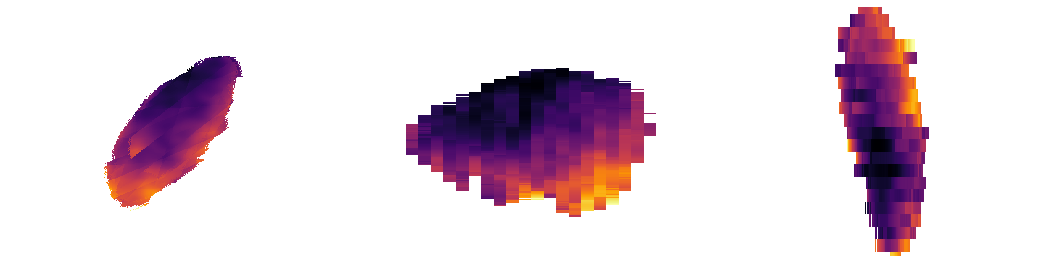

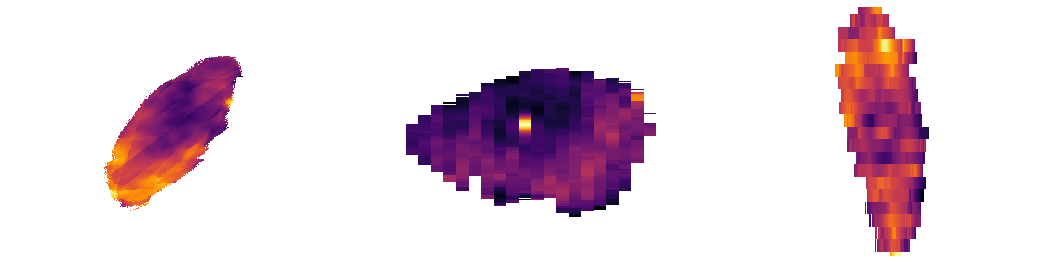

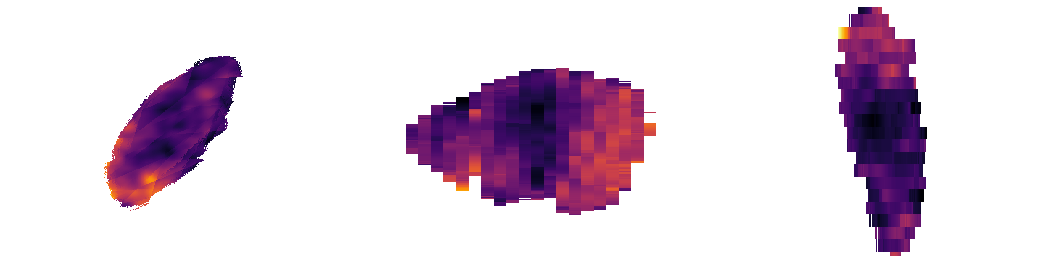

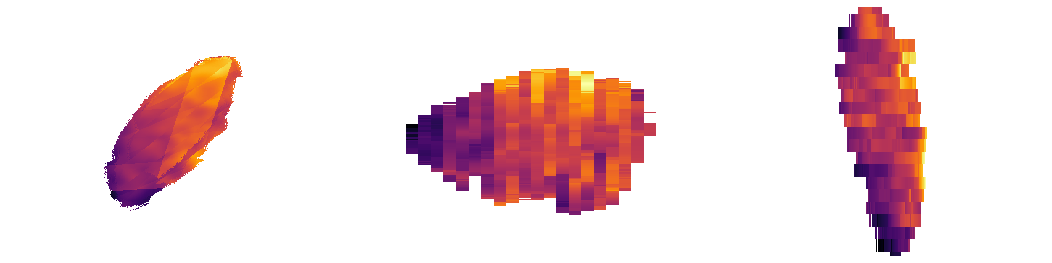

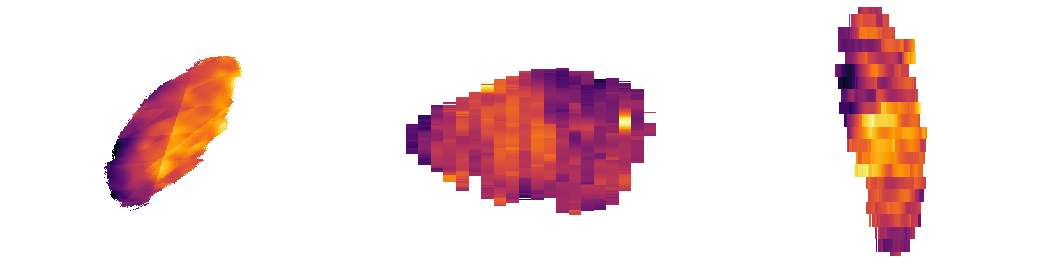

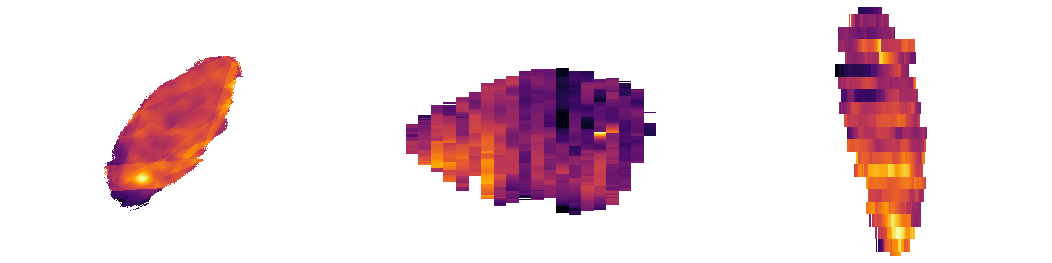

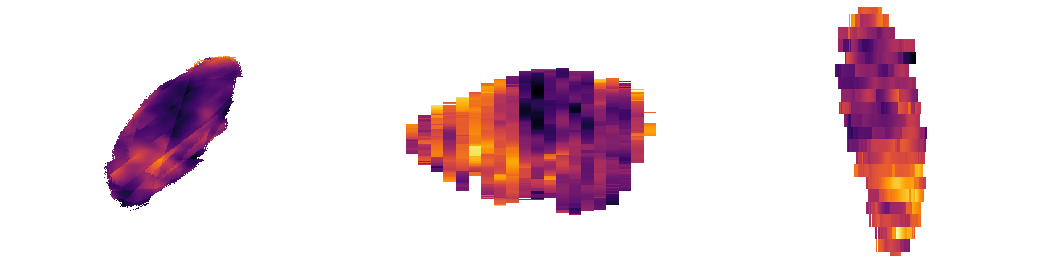

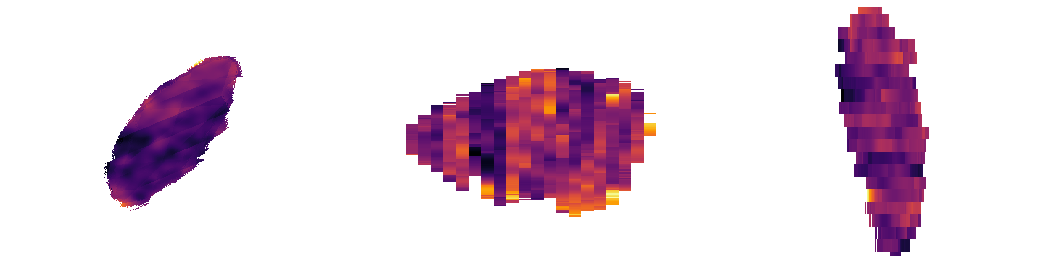

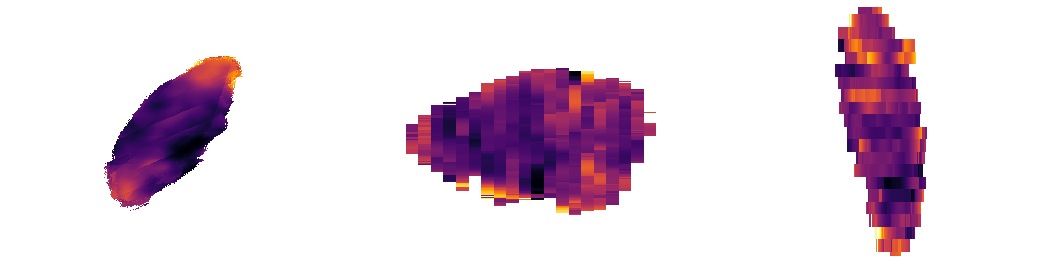

In [99]:
fwhm = 0.3

for stain_idx, stain in enumerate(stain_order[:]):
    
    fn = '%s_viz_inferno.pdf' % stain
    pdf = PdfPages(fn)
    
    print stain

    data = []

    for i, subject_id in enumerate(subject_ids[:]):

        i_d = '%02d' % i

        tmp = nb.load('/home/gdholla1/data/post_mortem/group_templates/transformed_stains_based_on_mask_template/_fwhm_{fwhm}_stain_{stain}/_applier{i}/{subject_id}_{stain}_fwhm_{fwhm}_flirt.nii.gz'.format(**locals())).get_data()

        tmp[tmp != 0] -= tmp[tmp != 0].mean()
        tmp[tmp != 0] /= tmp[tmp != 0].std()
        tmp[tmp == 0] = np.nan


        data.append(tmp)


    data = np.array(data)

    mask = np.isnan(data).sum(0) > 3

    mean_data = np.ma.masked_array(np.nanmean(data, 0), mask)

    t, p = sp.stats.ttest_1samp(data, 0, nan_policy='omit')
    
#     _, p[~mask] = statsmodels.sandbox.stats.multicomp.fdrcorrection0(p[~mask].ravel())



    t = np.ma.masked_array(t, mask)

    plt.figure(figsize=(15, 7.5))
    for i, c in enumerate(slice_ps):
        plt.subplot(1,3,i*3+1)

        plt.imshow(mean_data[:, c, :].T, origin='lower', cmap=plt.cm.inferno, extent=(0, mean_data.shape[-1] * xy_resolution, 0, mean_data.shape[0] * xy_resolution), interpolation='nearest')
        plt.ylim(1, 7)
        plt.xlim(1, 9)
        plt.xticks([])
        plt.yticks([]) 
        sns.despine(left=True, bottom=True)        


    for i, c in enumerate(x_ps):
        plt.subplot(1,3,i*3+2)
        plt.imshow(mean_data[c, :, :].T, origin='lower', cmap=plt.cm.inferno, extent=[0, z_resolution*mean_data.shape[1], 0, xy_resolution*mean_data.shape[2]], interpolation='nearest')
        plt.ylim(2, 8)
        plt.xlim(1, 9)
        plt.xticks([])
        plt.yticks([])   
        sns.despine(left=True, bottom=True)                


    for i, c in enumerate(z_ps):
        plt.subplot(1,3,i*3+3)
        plt.imshow(mean_data[:, :, c].T, origin='lower', cmap=plt.cm.inferno, extent=[0, xy_resolution*mean_data.shape[0], 0, z_resolution*mean_data.shape[1]], interpolation='nearest')
        plt.xlim(0, 8)
        plt.ylim(2, 8)
        plt.xticks([])
        plt.yticks([])
        sns.despine(left=True, bottom=True)                
        
    

    
    plt.tight_layout()
    plt.savefig(pdf, format='pdf', transparent=True)
#     plt.close(plt.gcf())
    
    pdf.close()

 clusters: 2


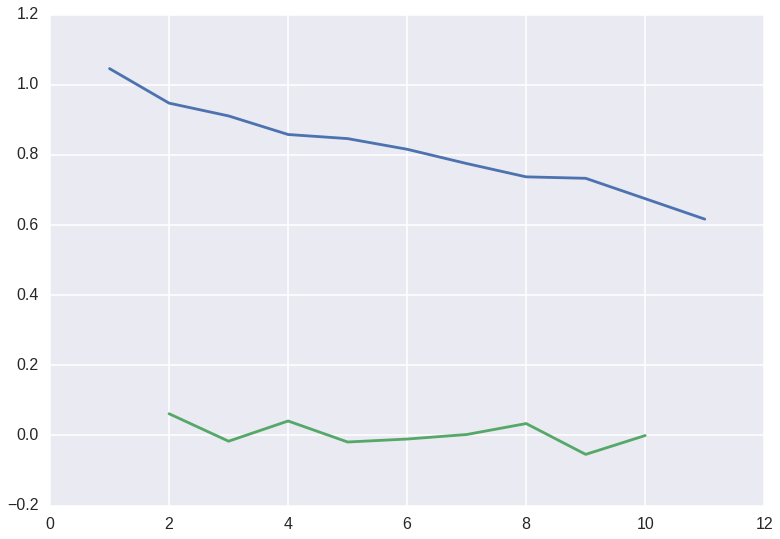

In [105]:
linkage

last = linkage[:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)

k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters

print "clusters:", k

[None, None, None, None, None, None, None, None, None, None, None, None]

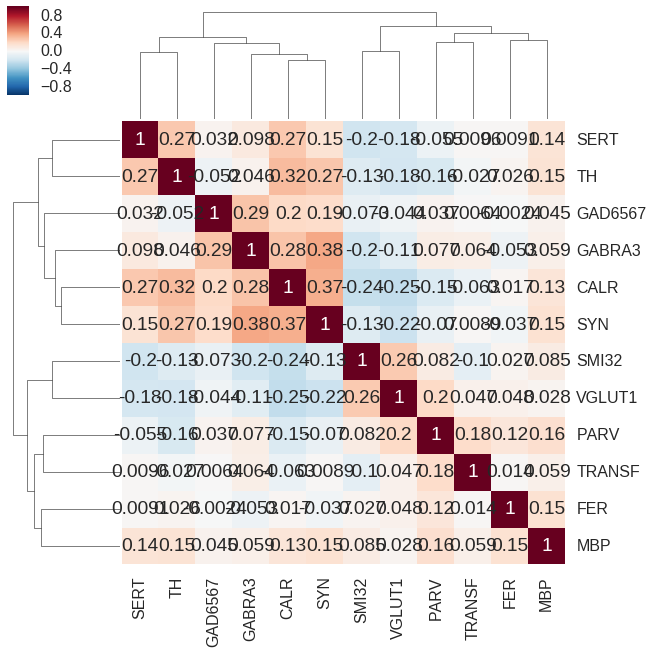

In [48]:
cg = sns.clustermap(mean_rs, annot=True, )
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)


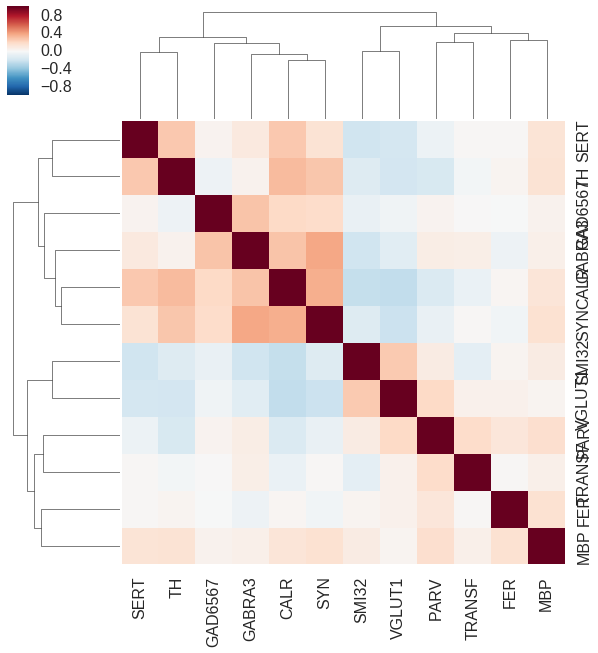

In [47]:
sns.clustermap(mean_rs)

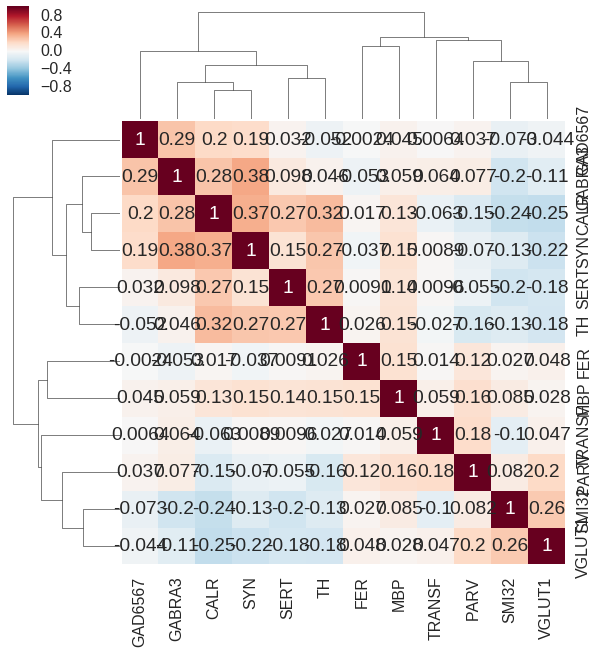

In [49]:
sns.clustermap(mean_rs, metric='correlation', annot=True)

In [51]:
Z

array([[  0.        ,   8.        ,   0.92757949,   2.        ],
       [  2.        ,  12.        ,   0.93789999,   3.        ],
       [  9.        ,  13.        ,   1.03711405,   4.        ],
       [  3.        ,  14.        ,   1.04914776,   5.        ],
       [  6.        ,  15.        ,   1.05889633,   6.        ],
       [  7.        ,  11.        ,   1.07037571,   2.        ],
       [  5.        ,  17.        ,   1.19917276,   3.        ],
       [ 10.        ,  18.        ,   1.20294632,   4.        ],
       [  1.        ,   4.        ,   1.23813667,   2.        ],
       [ 19.        ,  20.        ,   1.30216746,   6.        ],
       [ 16.        ,  21.        ,   1.31000058,  12.        ]])

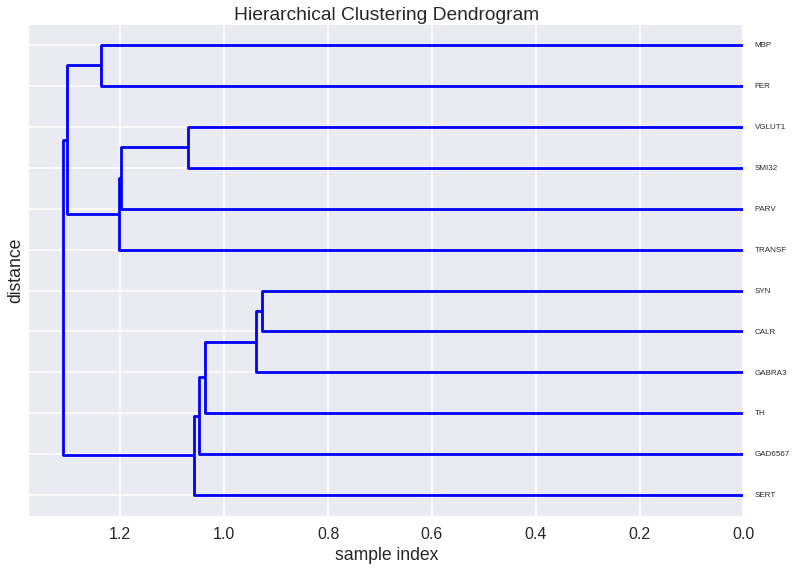

([<matplotlib.axis.XTick at 0xcd1a910>,
 <a list of 6 Text xticklabel objects>)

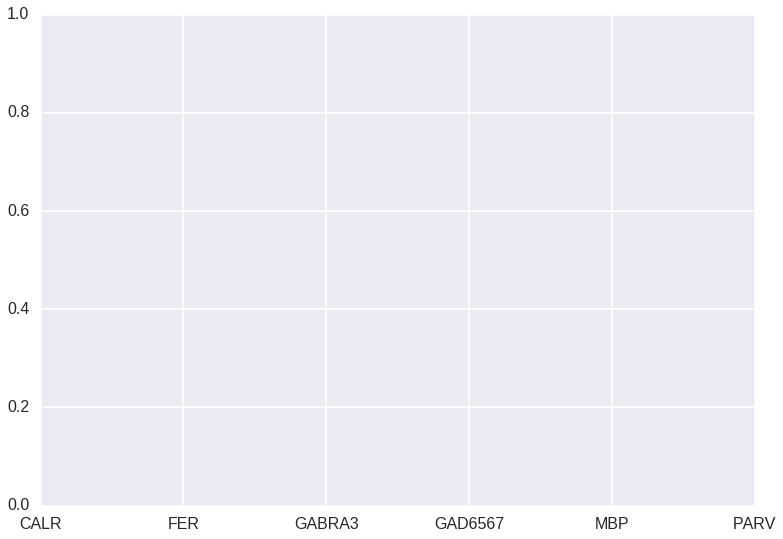

In [41]:
Z = sp.cluster.hierarchy.linkage(mean_rs, )

# calculate full dendrogram
# plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
sp.cluster.hierarchy.dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    orientation='left',
    labels=dataset.stains,
)
plt.show()

plt.xticks(plt.xticks()[0], mean_rs.columns)

In [12]:
mean_rs = np.mean([corr.values for corr in corrs],0)
mean_rs = np.ma.masked_array(mean_rs, p_corrected > 0.05)
pandas.DataFrame(mean_rs, columns=dataset.stains, index=dataset.stains)

sns.heatmap(pandas.DataFrame(np.round(mean_rs, 2), columns=dataset.stains, index=dataset.stains), annot=True)
plt.title('Significant stain-stain correlations over 7 subjects (FDR-corrected, q < 0.05)')
plt.savefig(pdf, format='pdf')

NameError: name 'p_corrected' is not defined

In [103]:
sns.set_style('whitegrid')
sns.set_context('poster')

In [105]:
len(subject_ids)

7

In [112]:
from matplotlib.backends.backend_pdf import PdfPages

In [113]:
pdf = PdfPages('correlation_plots_0.15mm.pdf')

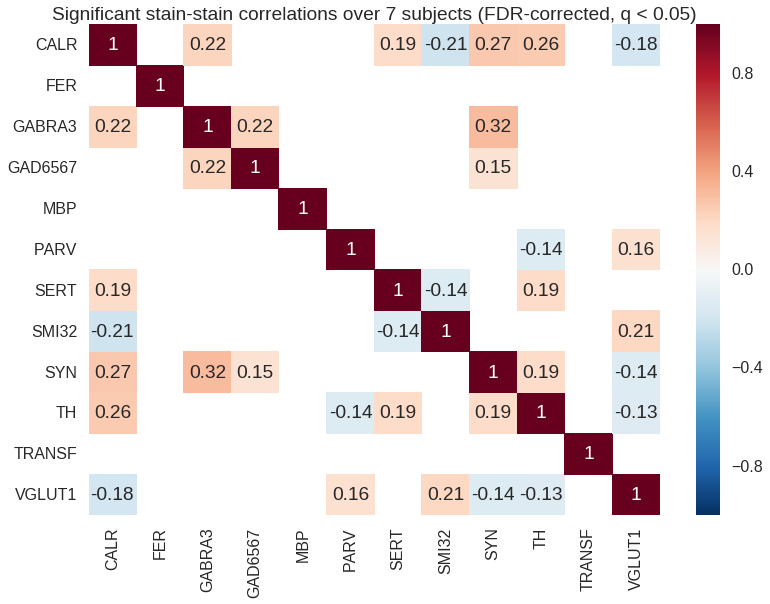

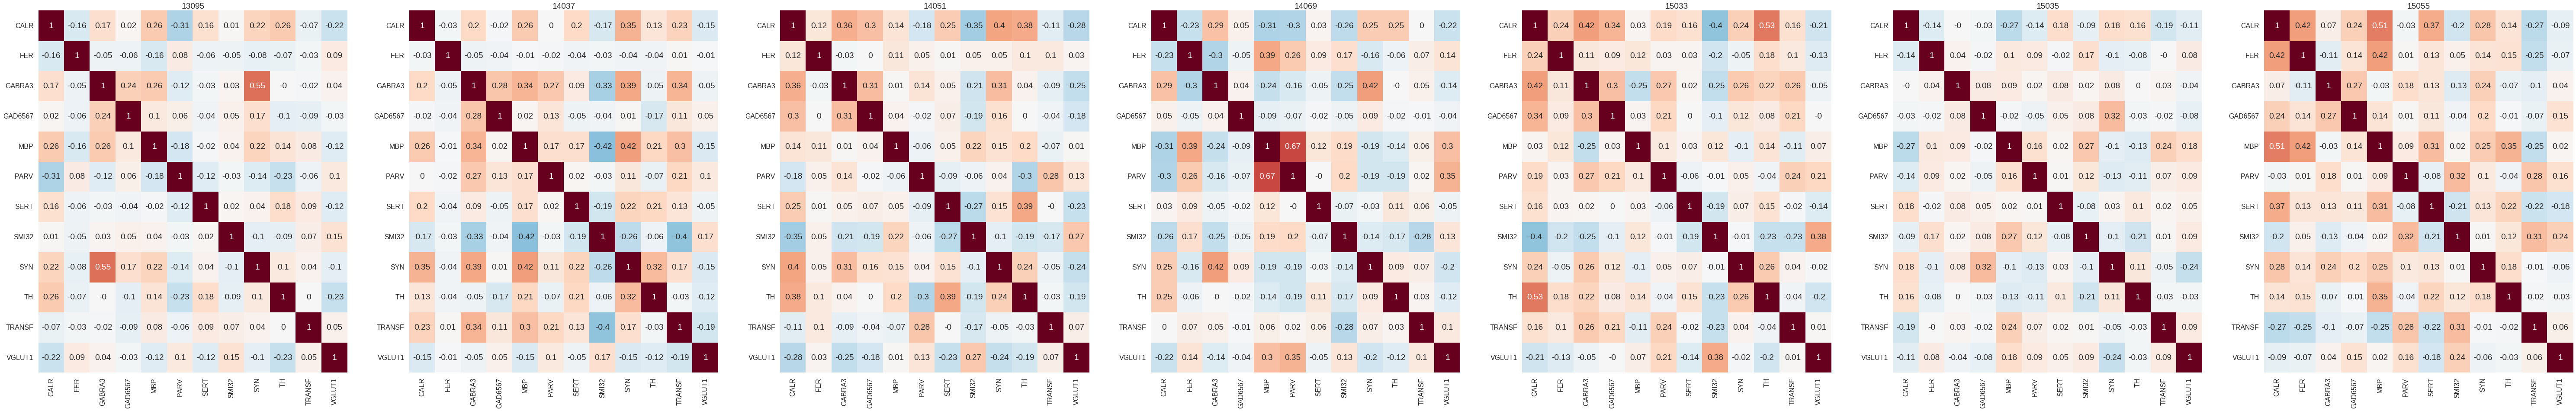

In [115]:
for i, subject_id in enumerate(subject_ids):
    plt.subplot(1,len(subject_ids), i+1)
    tmp = pandas.DataFrame(np.round(corr_matrix[i], 2), columns=dataset.stains, index=dataset.stains)
    sns.heatmap(tmp, cbar=False, vmin=-1, vmax=1, annot=True)
    plt.title(subject_id)

plt.gcf().set_size_inches(15*len(subject_ids), 15)
plt.savefig(pdf, format='pdf')

In [116]:
pdf.close()

# 0.3 mm

In [117]:
corrs = []

for subject_id in subject_ids[:]:
    dataset = StainDataset(subject_id, fwhm=0.3)
    corr = dataset.smoothed_dataframe.corr()
    corrs.append(corr)

/home/gdholla1/data/post_mortem/new_data_format/13095/images.hdf5
data_smoothed_0.3_thr_3 not cached
 *** CALR ***
All slices available for stain CALR!
 *** FER ***
All slices available for stain FER!
 *** GABRA3 ***
All slices available for stain GABRA3!
 *** GAD6567 ***
All slices available for stain GAD6567!
 *** MBP ***
All slices available for stain MBP!
 *** PARV ***
All slices available for stain PARV!
 *** SERT ***
Slices that are not available for stain SERT:
 * slice 1400 (can be interpolated)
 * slice 2100 (can be interpolated)
 *** SMI32 ***
All slices available for stain SMI32!
 *** SYN ***
All slices available for stain SYN!
 *** TH ***
Slices that are not available for stain TH:
 * slice 1200 (can be interpolated)
 * slice 1750 (can be interpolated)
 *** TRANSF ***
Slices that are not available for stain TRANSF:
 * slice 1200 (can be interpolated)
 * slice 2150 (can NOT be interpolated)
 *** VGLUT1 ***
All slices available for stain VGLUT1!
Smoothing CALR
Smoothing FER
S

In [118]:
corr_matrix = np.array([corr.values for corr in corrs])

(array([ 32.,   4.,   4.,   4.,   6.,   0.,   4.,   0.,   2.,   0.,   0.,
          0.,   0.,   2.,   4.,   2.,   2.,   0.,   0.,   2.,   2.,   0.,
          2.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   4.,   2.,   0.,
          0.,   0.,   0.,   2.,   0.,   2.,   2.,   4.,   2.,   2.,   0.,
          2.,   0.,   0.,   6.,   0.,   2.,   0.,   0.,   2.,   0.,   2.,
          0.,   2.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,
          4.,   0.,   0.,   0.,   2.,   0.,   0.,   2.,   0.,   0.,   0.]),
 array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
         0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
         0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
         0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
         0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41

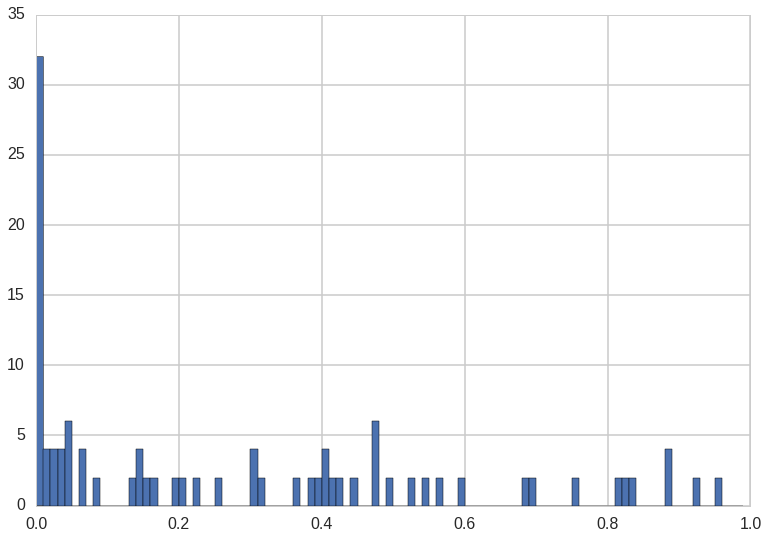

In [119]:
t, p = sp.stats.ttest_1samp(corr_matrix, 0)
np.fill_diagonal(p, np.nan)
plt.hist(p[~np.isnan(p)].ravel(), bins=np.arange(0, 1, 0.01))

In [120]:
_, p_corrected_ravel = multicomp.fdrcorrection0(p[p_mask].ravel(), alpha=0.05)
p_corrected = np.zeros_like(p)
p_corrected[p_mask] = p_corrected_ravel

In [121]:
mean_rs = np.mean([corr.values for corr in corrs],0)
mean_rs = np.ma.masked_array(mean_rs, p_corrected > 0.05)
pandas.DataFrame(mean_rs, columns=dataset.stains, index=dataset.stains)

CALR  FER    GABRA3   GAD6567  MBP      PARV      SERT     SMI32  \
CALR     1.000000  NaN  0.284788       NaN  NaN       NaN  0.272978 -0.235814   
FER           NaN  1.0       NaN       NaN  NaN       NaN       NaN       NaN   
GABRA3   0.284788  NaN  1.000000  0.288749  NaN       NaN       NaN       NaN   
GAD6567       NaN  NaN  0.288749  1.000000  NaN       NaN       NaN       NaN   
MBP           NaN  NaN       NaN       NaN  1.0       NaN       NaN       NaN   
PARV          NaN  NaN       NaN       NaN  NaN  1.000000       NaN       NaN   
SERT     0.272978  NaN       NaN       NaN  NaN       NaN  1.000000 -0.200811   
SMI32   -0.235814  NaN       NaN       NaN  NaN       NaN -0.200811  1.000000   
SYN      0.365099  NaN  0.383245  0.186872  NaN       NaN       NaN       NaN   
TH       0.318254  NaN       NaN       NaN  NaN       NaN  0.266847       NaN   
TRANSF        NaN  NaN       NaN       NaN  NaN       NaN       NaN       NaN   
VGLUT1  -0.249550  NaN       NaN       NaN  NaN  0.202211       NaN  0.262733   

              SYN        TH  TRANSF    VGLUT1  
CALR     0.365099  0.318254     NaN -0.249550  
FER           NaN       NaN     NaN       NaN  
GABRA3   0.383245       NaN     NaN       NaN  
GAD6567  0.186872       NaN     NaN       NaN  
MBP           NaN       NaN     NaN       NaN  
PARV          NaN       NaN     NaN  0.202211  
SERT          NaN  0.266847     NaN       NaN  
SMI32         NaN       NaN     NaN  0.262733  
SYN      1.000000  0.273519     NaN -0.215473  
TH       0.273519  1.000000     NaN -0.180537  
TRANSF        NaN       NaN     1.0       NaN  
VGLUT1  -0.215473 -0.180537     NaN  1.000000

In [123]:
pdf = PdfPages('correlation_plots_0.3mm.pdf')

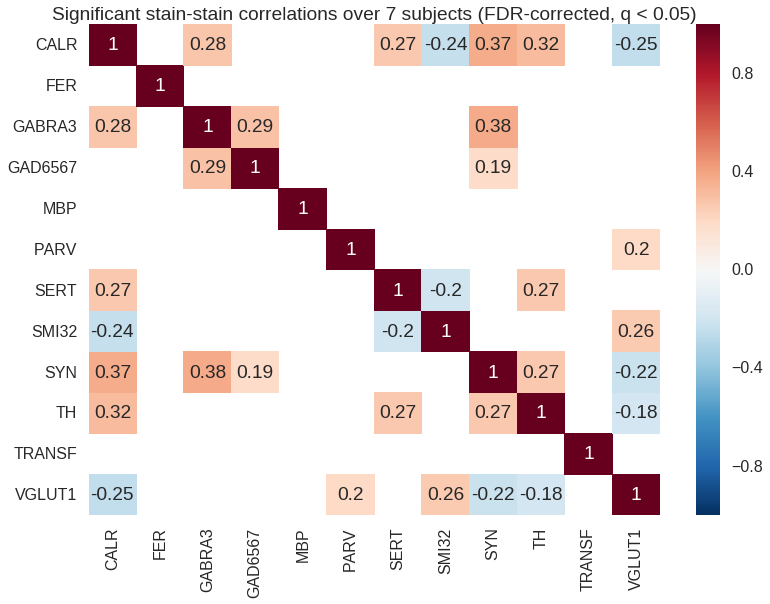

In [124]:
sns.heatmap(pandas.DataFrame(np.round(mean_rs, 2), columns=dataset.stains, index=dataset.stains), annot=True)
plt.title('Significant stain-stain correlations over 7 subjects (FDR-corrected, q < 0.05)')
plt.savefig(pdf, format='pdf')

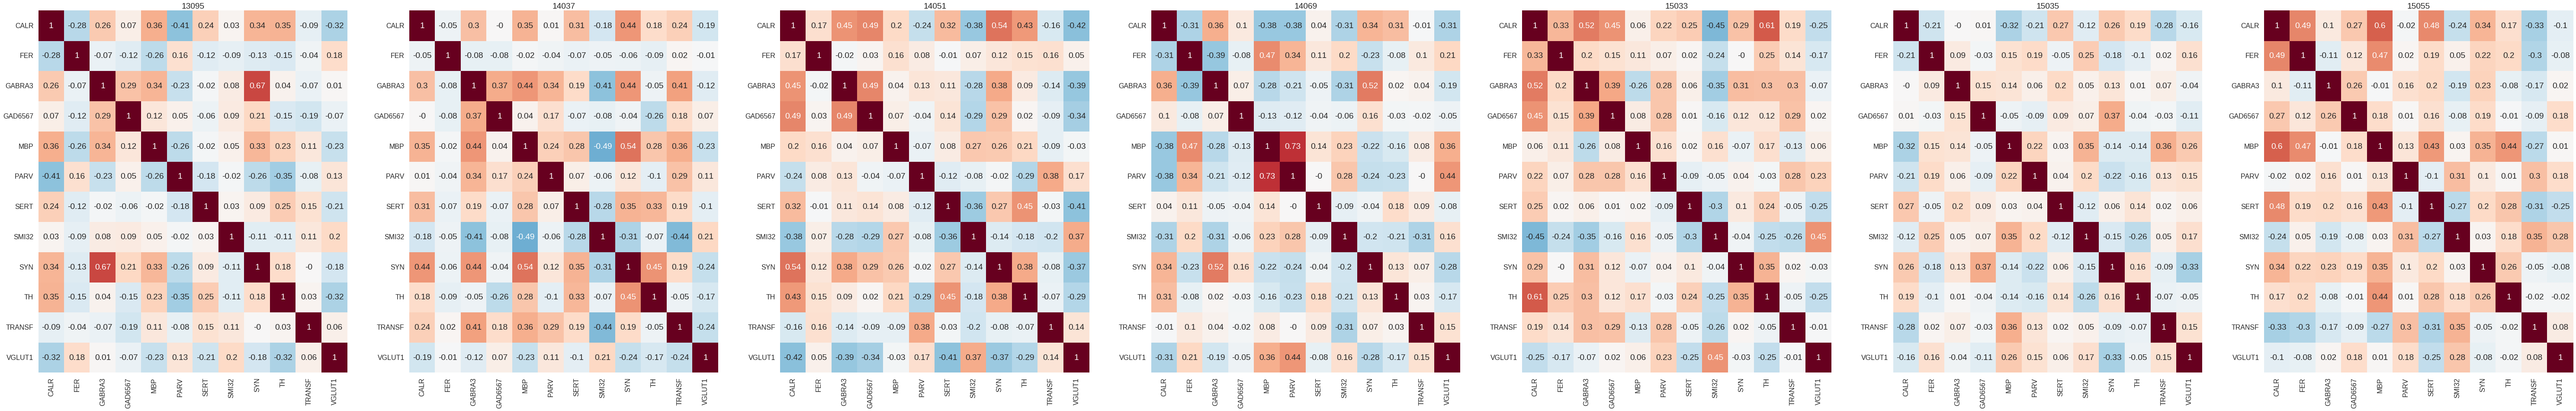

In [125]:
for i, subject_id in enumerate(subject_ids):
    plt.subplot(1,len(subject_ids), i+1)
    tmp = pandas.DataFrame(np.round(corr_matrix[i], 2), columns=dataset.stains, index=dataset.stains)
    sns.heatmap(tmp, cbar=False, vmin=-1, vmax=1, annot=True)
    plt.title(subject_id)

plt.gcf().set_size_inches(15*len(subject_ids), 15)
plt.savefig(pdf, format='pdf')

In [126]:

pdf.close()